In [12]:
import numpy as np
import cv2
from grid_detection import *
import keras
from keras.models import load_model

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [54]:
def rearange_list(nlist):
    dlist=[]
    for i in range(0, 9):
        k=9*i
        l=k+9
        sub_list=nlist[k:l]
        dlist.append(sub_list)
    return np.matrix(dlist)


def verify_possile_value(x, y, n, grid):
    for i in range(0, 9):
        if grid[x, i]==n:
            return False
        
    for i in range(0, 9):
        if grid[i, y]==n:
            return False
    x0=(x//3)*3
    y0=(y//3)*3
    for i in range(0, 3):
        for j in range(0, 3):
            if grid[x0+i, y0+j]==n:
                return False
            
    return True



def grid_solver(grid):
    for x in range(9):
        for y in range(9):
            if grid[x, y]==0:
                for n in range(1, 10):
                    if verify_possile_value(x, y, n, grid):
                        grid[x, y]=n
                        grid_solver(grid)
                        grid[x, y]=0 #Backtracking
    return grid




        

In [4]:
digits, coord=detect_grid_image('test_su.jpg')

In [6]:
print(np.shape(digits))

(81, 45, 45, 1)


In [13]:
model_path='models/digit_recognition_model2.h5'
model = load_model(model_path)
pred=model.predict(digits)

In [30]:
list_values=list(pred.argmax(1))
matrix_cell=rearange_list(list_values)
print(matrix_cell)

[[0 0 0 6 0 4 7 0 0]
 [7 0 6 0 0 0 0 0 9]
 [0 0 0 0 0 5 0 8 0]
 [0 7 0 0 2 0 0 9 3]
 [8 0 0 0 0 0 0 0 5]
 [4 3 0 0 1 0 0 7 0]
 [0 5 0 2 0 0 0 0 0]
 [3 0 0 0 0 0 2 0 8]
 [0 0 2 3 0 1 0 0 0]]


In [55]:
grid=matrix_cell

In [56]:
solution=grid_solver(grid)
print(solution)

[[5 8 3 6 9 4 7 2 1]
 [7 1 6 8 3 2 5 4 9]
 [2 9 4 1 7 5 3 8 6]
 [6 7 1 5 2 8 4 9 3]
 [8 2 9 7 4 3 1 6 5]
 [4 3 5 9 1 6 8 7 2]
 [1 5 8 2 6 7 9 3 4]
 [3 6 7 4 5 9 2 1 8]
 [9 4 2 3 8 1 6 5 7]]


In [19]:
def solve(bo):
    find = find_empty(bo)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if valid(bo, i, (row, col)):
            bo[row][col] = i

            if solve(bo):
                return True

            bo[row][col] = 0

    return False


def valid(bo, num, pos):
    # Check row
    for i in range(len(bo[0])):
        if bo[pos[0]][i] == num and pos[1] != i:
            return False

    # Check column
    for i in range(len(bo)):
        if bo[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if bo[i][j] == num and (i,j) != pos:
                return False

    return True


def print_board(bo):
    for i in range(len(bo)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")

        for j in range(len(bo[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")

            if j == 8:
                print(bo[i][j])
            else:
                print(str(bo[i][j]) + " ", end="")


def find_empty(bo):
    for i in range(len(bo)):
        for j in range(len(bo[0])):
            if bo[i][j] == 0:
                return (i, j)  # row, col

    return None

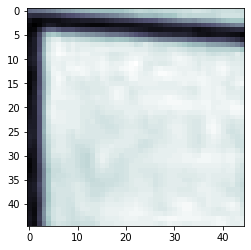

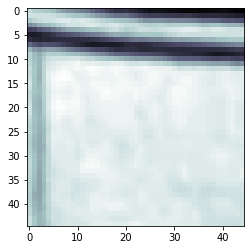

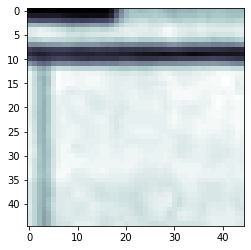

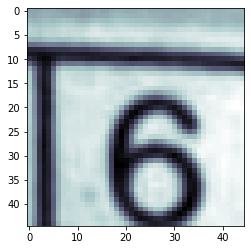

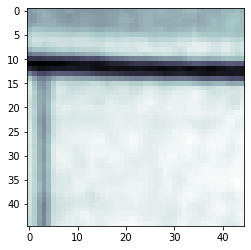

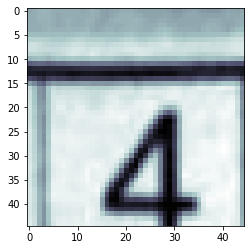

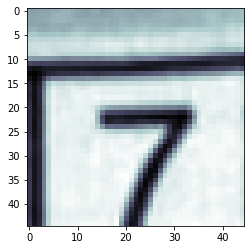

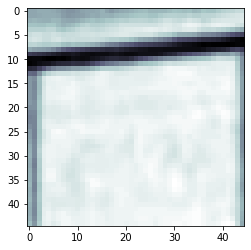

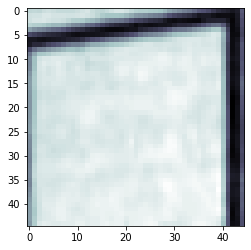

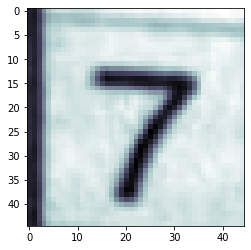

In [10]:
for i in range(0, 10):
    plt.imshow(digits[i, :, :, 0], cmap='bone')
    plt.show()
    